Author: Gautam Kumar, Tokyo.

This is a demo julyter notebook for EDA and classification of presence of a desease. First step will be to change the working directory, import the common libraries to read both the train and test data.


In [46]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


cur_wd = "XXXXX\\XXXXXX\\XXXXXXXXXXX\\XXXXXX"
os.chdir(cur_wd)


In [47]:
train_data_df = pd.read_csv("train_data.csv")
final_test_data_df = pd.read_csv("test_data.csv")
    

Write a method to plot distribution of columns using histograms. I write another utility method to format string into Date.

In [48]:

def plot_distributions_hist(x_df,col_list):
    for col in col_list:
        x_df[[col]].hist(bins=10)
                         

def format_str_To_Date(x_df,col_list,formStr):
    for col in col_list:
        x_df[col] = pd.to_datetime(x_df[col],format= formStr)
        x_df[col] = x_df[col].dt.date
        
    return x_df

def create_date_Diff_Var(x_df):
    x_df = format_str_To_Date(x_df,['diagnose_date','treatment_date'],'%Y-%m-%d') 
    x_df['diag_treat_diff'] = abs(x_df['treatment_date'] - x_df['diagnose_date'])
    x_df['diag_treat_diff'] = x_df['diag_treat_diff'].dt.days
    return x_df
        


Check the percentage of missing values in the xolumns.

In [49]:
train_data_df = format_str_To_Date(train_data_df,['diagnose_date','treatment_date'],'%Y-%m-%d')
    
    
train_data_df = create_date_Diff_Var(train_data_df)
final_test_data_df = create_date_Diff_Var(final_test_data_df)

In [50]:

## Check the mission percentage
train_data_df.isnull().sum() * 100 / len(train_data_df)

radius_0            0.000000
texture_0           0.000000
perimeter_0         0.000000
radius_1           13.819095
texture_1           0.000000
perimeter_1        33.668342
radius_2            0.000000
texture_2           0.000000
perimeter_2         0.000000
age                 0.000000
treatment_date      0.000000
diagnose_date       0.000000
cancer_type         0.000000
diag_treat_diff     0.000000
dtype: float64

Wee see that radius_1 and perimeter_1 are the columns which has many missing values. 14% and 34% of values are missing
respectively in these two columns. 




#Tretment of Missing Values.

When i think how to treat these missing values in these two columns i see that the test data also has many missing values in these two columns, so it wont be wise to remove these rows with missing values. I also checked manually if, the missingness has any pattern with respect to the final outcome cancer_type age etc. But missing values were not showing any patterns with respect to these columns.

In [51]:
percent_missing_test = final_test_data_df.isnull().sum() * 100 / len(final_test_data_df)
percent_missing_test

radius_0            0.000000
texture_0           0.000000
perimeter_0         0.000000
radius_1           14.619883
texture_1           0.000000
perimeter_1        38.596491
radius_2            0.000000
texture_2           0.000000
perimeter_2         0.000000
age                 0.000000
treatment_date      0.000000
diagnose_date       0.000000
diag_treat_diff     0.000000
dtype: float64

We see that test data also has values missing in the same columns and proportion is same as well. Now if we try to remove all the rows having missing values from these two columns as below and check the shape of dataframe, 

There is a 3rd type of wrong values in the column texture_2, where I see values 'xx'. This values doesnt look normal as this column also is a numeric column. So I will be imputing values as per my strategy as well to avoid information loss.

In [52]:
train_data_noNAN_df = train_data_df[train_data_df.radius_1.notnull()]
train_data_noNAN_df = train_data_noNAN_df[train_data_noNAN_df.perimeter_1.notnull()]
train_data_noNAN_df.shape

(209, 14)

we see that we have almost 50 percent of the train data gone, which will cause lot of information loss. So removing the rows will not be a good decision.To remove the column or not is a decision , I will take after checking the vaariable importance.

So It looks like keeping these rows with missing values and thinking about how to impute values, is a good strategy. There is another type of missing information where value is not missing completely but, are hidden as a string 'xx' in a column 'texture_2' while this column has most values as float values.

some patterns that i see in the missing data (Abnormalities).

1.) The rows in which values are missing for columns radius_1 and perimeter_1 are mutually exclusively.

2.) But there are rows where one of/both of radius_1 and perimeter_1 values are missing and texture_2 values are hidden as 'xx'



Clustering for number of clusters =========>>>>>> k= 2 Inertia: 43706166.56093112
Clustering for number of clusters =========>>>>>> k= 3 Inertia: 21162389.596797995
Clustering for number of clusters =========>>>>>> k= 4 Inertia: 12878432.191809397
Clustering for number of clusters =========>>>>>> k= 5 Inertia: 9701661.14250959
Clustering for number of clusters =========>>>>>> k= 6 Inertia: 7586858.128912535
Clustering for number of clusters =========>>>>>> k= 7 Inertia: 6113222.873497404
Clustering for number of clusters =========>>>>>> k= 8 Inertia: 5121997.06778514
Clustering for number of clusters =========>>>>>> k= 9 Inertia: 4430575.215970188
Clustering for number of clusters =========>>>>>> k= 10 Inertia: 4056200.342256034
Clustering for number of clusters =========>>>>>> k= 11 Inertia: 3691493.0821351022
Clustering for number of clusters =========>>>>>> k= 12 Inertia: 3359244.4356281264
Clustering for number of clusters =========>>>>>> k= 13 Inertia: 3082036.7035430754
Clusterin

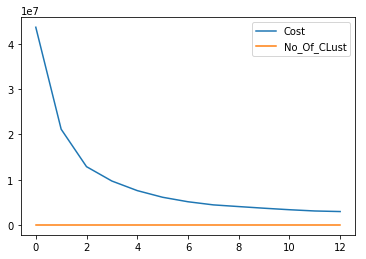

In [54]:
from sklearn.cluster import KMeans
def cluster_without_misVal_cols(x_df):
    
    inertia_list = list()
    no_cluster_list = list()
    for k in range(2,15):
        
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(x_df)
        centroids = kmeans.cluster_centers_
        #print(kmeans.labels_)
        print("Clustering for number of clusters =========>>>>>> k= " + str(k) + " Inertia: " + str(kmeans.inertia_))
        inertia_list.append(kmeans.inertia_)
        no_cluster_list.append(k)
    
    clust_cost_df = pd.DataFrame(data = {'No_Of_CLust':no_cluster_list,'Cost':inertia_list})
    clust_cost_df.to_csv("clust_cost_df.csv")
    clust_cost_df.plot()
    return clust_cost_df


## Check how many rows has 'xx' as the value in the column 'texture_2'
train_data_tr2_xx_df = train_data_df.loc[train_data_df.texture_2 == 'xx',]
train_data_tr2_xx_df.shape

## Prepare data frame without the columns radius_1 and perimeter_1 which have the missing values.
## We are doing the so that we have only numeric columns to run the kmeans on.
train_data_allNum_df = train_data_df[['radius_0','texture_0','perimeter_0','texture_1','radius_2','texture_2','perimeter_2','age','diag_treat_diff']]
train_data_allNum_df = train_data_allNum_df.loc[train_data_allNum_df.texture_2 != 'xx',]

## Run the Kmeans method defined above.
clust_cost_df = cluster_without_misVal_cols(train_data_allNum_df)
    

Missing Value Imputation strategy:

Srategy 1
----------

1.) Find out the mean of column for SIMILAR ROWS compared to the row where we are imputing the value.

2.) To find the similar rows, i do a kmeans clustering. Just to check if there are any other grouping of rows, other than cancer_type=0 and 1.

3.) I run the kmeans on the dataframe after removing the columns which has missing values and removing the rows where, the column texture_2 has non numeric values 'xx'.

4.) Plot the graph between sum of inter cluster distance vs. number of clusters. run the code sections below



Here we see that main elbow of this plot, is at number of cluster = 2. Which tells us that there are only two cluster of rows in the dataframe. Considering these categories are the cancer_type = 0 or 1 (Since we have knowledge of this dataset, that its a dataset about cancer_type= 0 and 1). I will replace the missing values by mean of the column for the corresponding category of cancer type. (For. Ex. if the row has cancer type = 0, replace the missing value by mean of the column by in this category of cancer type.)


Strategy 2.[Did not implement this strategy, due to lack of time, But I can explain how to implement it]
---------------
1.) Build a Linear regression (Columns with missing values as response (Y), and other columns as explanatory variables (Y), using the rows where, data is not missing in these radius_1 and perimeter_1 columns.) to estimate the missing values for rows in the columns radius_1, perimeter_1.

2.) Use the Linear regression, to estimate and impute the missing values of these two columns.

Write the method to impute the missing and hidden values as per strategy 1 above,

In [55]:
def impute_missing_Values_train(x_df):
    train_data_rad_1NoNAN_df = x_df[x_df.radius_1.notnull()]
    
    mean_radius_1_ct_0 = train_data_rad_1NoNAN_df.loc[train_data_rad_1NoNAN_df.cancer_type == 0,].radius_1.mean()
    mean_radius_1_ct_1 = train_data_rad_1NoNAN_df.loc[train_data_rad_1NoNAN_df.cancer_type == 1,].radius_1.mean()
    
    train_data_per1NoNAN_df = x_df[x_df.perimeter_1.notnull()]
    
    mean_periM_1_ct_0 = train_data_per1NoNAN_df.loc[train_data_per1NoNAN_df.cancer_type == 0,].perimeter_1.mean()
    mean_periM_1_ct_1 = train_data_per1NoNAN_df.loc[train_data_per1NoNAN_df.cancer_type == 1,].perimeter_1.mean()

    train_data_tx2Noxx_df = x_df.loc[x_df.texture_2 != 'xx',]
    
    train_data_tx2Noxx_df.texture_2 = train_data_tx2Noxx_df.texture_2.apply(float)
#    train_data_tx2Noxx_df.texture_2 = train_data_tx2Noxx_df.texture_2.apply(float)
    
    mean_text_2_ct_0 = train_data_tx2Noxx_df.loc[train_data_tx2Noxx_df.cancer_type == 0,].texture_2.mean()
    mean_text_2_ct_1 = train_data_tx2Noxx_df.loc[train_data_tx2Noxx_df.cancer_type == 1,].texture_2.mean()

    
    train_rad_1null_df = x_df[x_df.radius_1.isnull()]
#    train_rad_1null_df.loc[train_rad_1null_df.cancer_type == 0,'radius_1'] = mean_radius_1_ct_0
#    train_rad_1null_df.loc[train_rad_1null_df.cancer_type == 1,'radius_1'] = mean_radius_1_ct_1
#    train_rad_1null_df.to_csv("train_rad_1null_df.csv")
    train_rad_1null_df['radius_1'] = np.where(train_rad_1null_df.cancer_type == 0, mean_radius_1_ct_0, train_rad_1null_df.radius_1)
    train_rad_1null_df['radius_1'] = np.where(train_rad_1null_df.cancer_type == 1, mean_radius_1_ct_1, train_rad_1null_df.radius_1)
    train_rad_1null_df['texture_2'] = np.where(train_rad_1null_df.cancer_type == 0, mean_text_2_ct_0, train_rad_1null_df.texture_2)
    train_rad_1null_df['texture_2'] = np.where(train_rad_1null_df.cancer_type == 1, mean_text_2_ct_1, train_rad_1null_df.texture_2)
   
    
    train_rad_1null_df.to_csv("train_rad_1null_df.csv")
    
    train_peri_1null_df = x_df[x_df.perimeter_1.isnull()]
#    train_rad_1null_df.loc[train_rad_1null_df.cancer_type == 0,'radius_1'] = mean_radius_1_ct_0
#    train_rad_1null_df.loc[train_rad_1null_df.cancer_type == 1,'radius_1'] = mean_radius_1_ct_1
#    train_rad_1null_df.to_csv("train_rad_1null_df.csv")
    train_peri_1null_df['perimeter_1'] = np.where(train_peri_1null_df.cancer_type == 0, mean_periM_1_ct_0, train_peri_1null_df.perimeter_1)
    train_peri_1null_df['perimeter_1'] = np.where(train_peri_1null_df.cancer_type == 1, mean_periM_1_ct_1, train_peri_1null_df.perimeter_1)
    train_peri_1null_df['texture_2'] = np.where(train_peri_1null_df.cancer_type == 0, mean_text_2_ct_0, train_peri_1null_df.texture_2)
    train_peri_1null_df['texture_2'] = np.where(train_peri_1null_df.cancer_type == 1, mean_text_2_ct_1, train_peri_1null_df.texture_2)
   
    
    
    train_peri_1null_df.to_csv("train_peri_1null_df.csv")
    
    train_data_tx2xx_df = x_df.loc[(x_df.texture_2 == 'xx') & (x_df.perimeter_1.notnull() & (x_df.radius_1.notnull())),]
    
    train_data_tx2xx_df['texture_2'] = np.where(train_data_tx2xx_df.cancer_type == 0, mean_text_2_ct_0, train_data_tx2xx_df.texture_2)
    train_data_tx2xx_df['texture_2'] = np.where(train_data_tx2xx_df.cancer_type == 1, mean_text_2_ct_1, train_data_tx2xx_df.texture_2)
    train_data_tx2xx_df['radius_1'] = np.where(train_data_tx2xx_df.cancer_type == 0, mean_radius_1_ct_0, train_data_tx2xx_df.radius_1)
    train_data_tx2xx_df['radius_1'] = np.where(train_data_tx2xx_df.cancer_type == 1, mean_radius_1_ct_1, train_data_tx2xx_df.radius_1)
    train_data_tx2xx_df['perimeter_1'] = np.where(train_data_tx2xx_df.cancer_type == 0, mean_periM_1_ct_0, train_data_tx2xx_df.perimeter_1)
    train_data_tx2xx_df['perimeter_1'] = np.where(train_data_tx2xx_df.cancer_type == 1, mean_periM_1_ct_1, train_data_tx2xx_df.perimeter_1)
    
    
    train_data_tx2xx_df.to_csv("train_data_tx2xx_df.csv")
    
    replaced_values_df = pd.DataFrame(columns = list(train_data_df))
    replaced_values_df = replaced_values_df.append(train_rad_1null_df)
    replaced_values_df = replaced_values_df.append(train_peri_1null_df)
    replaced_values_df = replaced_values_df.append(train_data_tx2xx_df)
    
    x_df_rest = train_data_df[train_data_df.radius_1.notnull()]
    x_df_rest = x_df_rest[x_df_rest.perimeter_1.notnull()]
    x_df_rest = x_df_rest.loc[x_df_rest.texture_2 != 'xx',]
    
    x_return_df = pd.DataFrame(columns = list(train_data_df))
    x_return_df = x_return_df.append(x_df_rest)
    x_return_df = x_return_df.append(replaced_values_df)
    x_return_df.drop_duplicates(inplace=True)
#    x_return_df = x_return_df.append(train_data_tx2xx_df)
    return x_return_df


train_imputed_data_df = impute_missing_Values_train(train_data_df)
print("Shape of train data df ======>>> " + str(train_data_df.shape))

print("Shape of train_imputed_data_df ======>>> " + str(train_imputed_data_df.shape))

C:\Users\Dell 3450\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\Dell 3450\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dell 3450\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

Shape of train data df ======>>> (398, 14)
Shape of train_imputed_data_df ======>>> (398, 14)


C:\Users\Dell 3450\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dell 3450\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dell 3450\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

Check the stats of all numeric columns, which means all the explanatory variables

In [56]:

numeric_cols = ['radius_0','texture_0','perimeter_0','radius_1','texture_1','perimeter_1','radius_2','texture_2','perimeter_2','age','diag_treat_diff']
train_imputed_data_df[numeric_cols].describe()

,radius_0,texture_0,perimeter_0,radius_1,texture_1,perimeter_1,radius_2,perimeter_2
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,21.303711,18.957554,92.128890,14.102851,30.417222,94.095169,14.134922,127.222422
std,49.987646,6.243499,25.159787,3.562219,15.027855,24.534843,3.748146,49.097558
min,6.401956,-17.243202,45.612505,5.752395,2.395868,43.444930,7.079847,44.918942
25%,11.693885,14.581364,74.975361,11.921958,19.898062,79.523415,11.573592,84.123724
50%,13.468170,18.238742,87.376764,13.124615,30.897762,85.312122,13.333610,129.992697
75%,16.323024,22.494291,104.876420,16.551134,42.555657,115.820970,16.093900,169.538170
max,561.311068,40.064462,193.755763,29.645166,55.820612,227.162938,28.563252,214.192377


Here, Only one a column has minimum value which is less than 0 in texture_0 column. I checked the test data and it doesnt have any negative value. So it will be good to remove that one row which has a negative value for texture_0 column.

Now Create a numerical variable from diagnosis date and treatment date difference and then remove the diagnosis and treatment dates.


Now Plot the histogram to see the distribution of explanatory variables

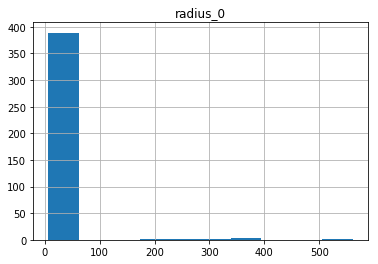

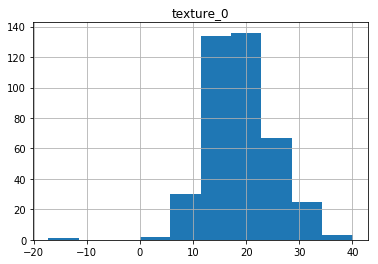

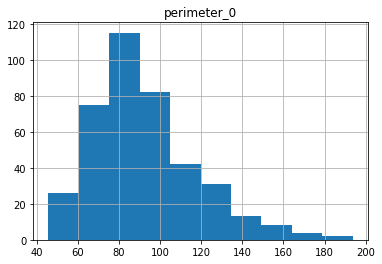

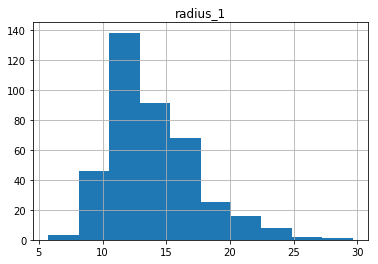

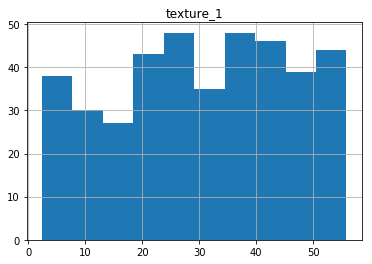

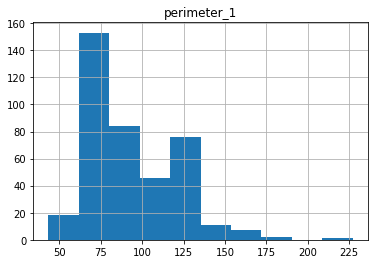

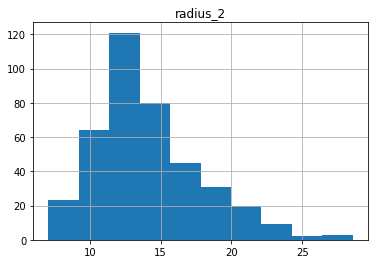

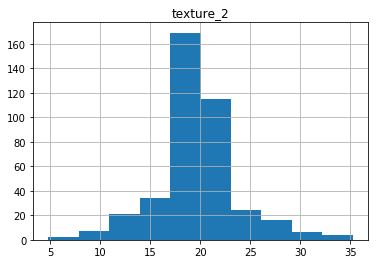

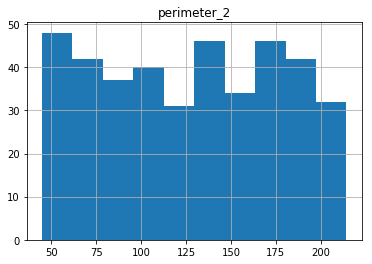

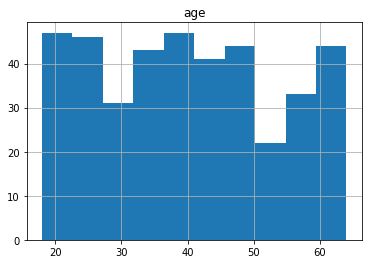

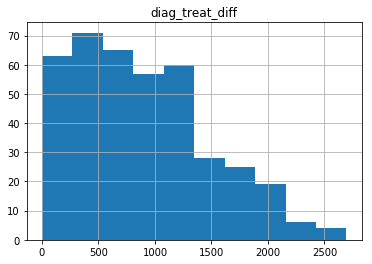

In [57]:

train_imputed_data_df[numeric_cols] = train_imputed_data_df[numeric_cols].astype(np.float)
plot_distributions_hist(train_imputed_data_df,numeric_cols)    


Write a method to plot the box plots of the variables
PLot the box plots of numerical variables


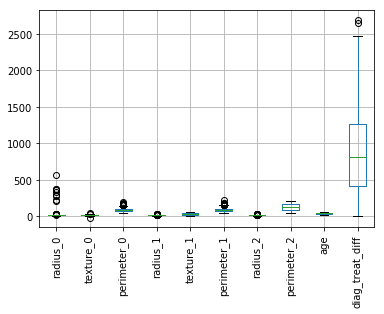

In [58]:
print("Write a method to plot the box plots of the variables")
def plotBoxPlotsByCancerType(x_df,cType):
    if(cType == 'cancer_type'):
         x_df[['radius_0','texture_0','perimeter_0','cancer_type']].boxplot(by='cancer_type')
         x_df[['radius_1','texture_1','perimeter_1','cancer_type']].boxplot(by='cancer_type')
         x_df[['radius_2','texture_2','perimeter_2','cancer_type']].boxplot(by='cancer_type')
         x_df[['age','cancer_type']].boxplot(by='cancer_type')
         x_df[['diag_treat_diff','cancer_type']].boxplot(by='cancer_type')
    elif(cType=='explanatory_vars'):
         temp_df = x_df.drop(['cancer_type','diagnose_date','treatment_date'],axis=1)
         temp_df.boxplot()
         plt.xticks(rotation=90)

print("PLot the box plots of numerical variables")
train_imputed_data_df['diag_treat_diff'] = train_imputed_data_df['diag_treat_diff'].apply(float)
train_imputed_data_df['age'] = train_imputed_data_df['age'].apply(float)
plotBoxPlotsByCancerType(train_data_df,'explanatory_vars')





Note: The box plots shows that there are outliers in the columns radius_0, texture_0, permieter_0,perimeter_1,radius_2 and in
      diag_treat_diff

PLot the box plots of explanatory variables by the cancer type


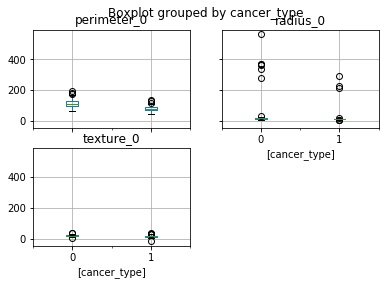

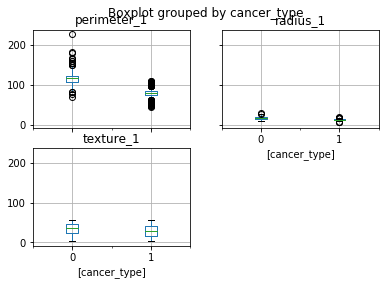

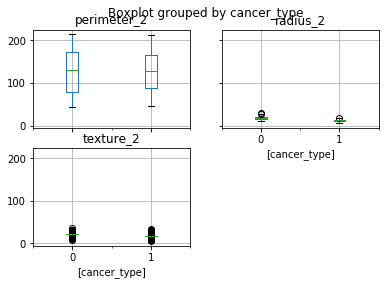

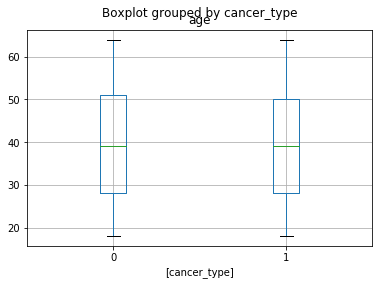

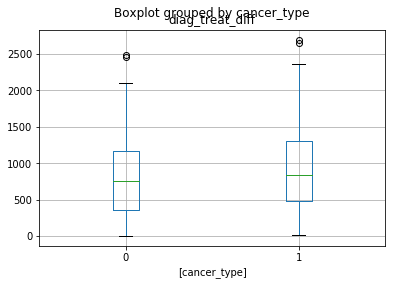

In [59]:
print("PLot the box plots of explanatory variables by the cancer type")
plotBoxPlotsByCancerType(train_imputed_data_df,'cancer_type')

Above boxplots, Shows that there are difference in distributions of perimeter_0, perimeter_1, radius_0,radius_1,radius_2,texture_1 etc with respect to final response variable cancer_type. This list gives an idea of important features. Some variables like 'Age'and 'diag_treat_diff' is showing very less difference in the ditribution based on cancer_type.

In [62]:
corr = train_imputed_data_df[numeric_cols].corr()
corr.style.background_gradient(cmap='coolwarm')

,radius_0,texture_0,perimeter_0,radius_1,texture_1,perimeter_1,radius_2,texture_2,perimeter_2,age,diag_treat_diff,log_diag_treat_diff,log_age,log_perimeter_2,log_texture_1
radius_0,1,0.0902597,0.127806,0.139668,0.0813388,0.139581,0.147473,0.0717921,-0.0880023,0.0477842,0.0535206,0.0512612,0.0455845,-0.0949075,0.085545
texture_0,0.0902597,1,0.180504,0.201579,0.0545361,0.207554,0.171654,0.408174,0.0295769,0.015494,0.024759,0.025308,0.0144631,0.0203633,0.031928
perimeter_0,0.127806,0.180504,1,0.802974,0.151266,0.767958,0.820268,0.30131,-0.0268815,-0.0599031,-0.0955406,-0.0871865,-0.0670745,-0.0340028,0.139754
radius_1,0.139668,0.201579,0.802974,1,0.160809,0.736722,0.835993,0.284902,0.0160252,-0.0540162,-0.0741483,-0.0675116,-0.0565355,0.00208515,0.129435
texture_1,0.0813388,0.0545361,0.151266,0.160809,1,0.130941,0.0981138,0.101574,-0.0841248,0.0550635,-0.0203521,-0.0206772,0.0459198,-0.0693353,0.937912
perimeter_1,0.139581,0.207554,0.767958,0.736722,0.130941,1,0.800601,0.293905,0.023891,-0.0870814,-0.0864003,-0.0711831,-0.0935817,0.00673552,0.122614
radius_2,0.147473,0.171654,0.820268,0.835993,0.0981138,0.800601,1,0.221249,-0.0136575,-0.112529,-0.0741109,-0.0718392,-0.116372,-0.0272762,0.0929627
texture_2,0.0717921,0.408174,0.30131,0.284902,0.101574,0.293905,0.221249,1,0.0206193,0.0178753,-0.0333972,-0.0515815,0.00430196,0.000312028,0.106583
perimeter_2,-0.0880023,0.0295769,-0.0268815,0.0160252,-0.0841248,0.023891,-0.0136575,0.0206193,1,0.0300572,-0.035906,-0.0145522,0.0161498,0.981572,-0.0821457
age,0.0477842,0.015494,-0.0599031,-0.0540162,0.0550635,-0.0870814,-0.112529,0.0178753,0.0300572,1,0.112484,0.0197027,0.985797,0.0361279,0.0688472


Above correlation matrix shows that there are pairs of explanatory variables
(perimeter_0,perimeter_1),
(radius_1,radius_2),
(radius_1,perimeter_1) and
(perimeter_0,radius_2) which have correlation higher than 0.80. Out of these correlation of corresponding radius and perimeter look obvious (Still i dont take any assumptions , by considering the enlgish meaning of the column names)

There are some variables for which, the distribution looks far from Normal distribution for example, diag_treat_diff,age,perimeter_2,texture_1. So I will try to see how do distribution of log transformations of this variables look,


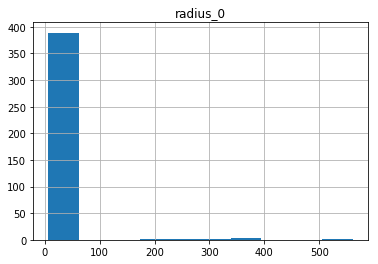

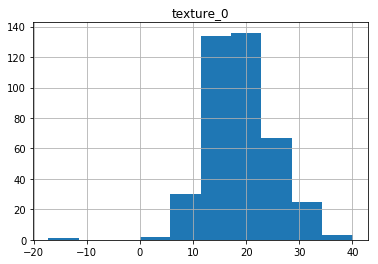

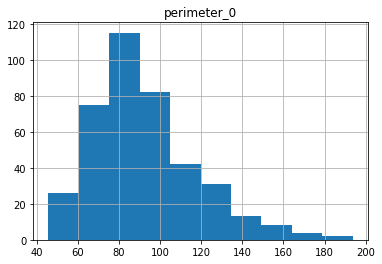

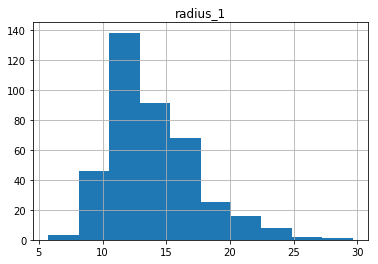

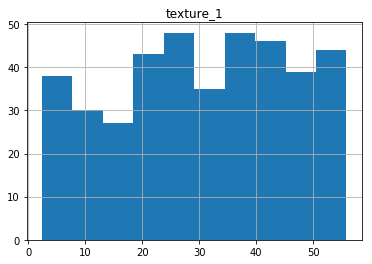

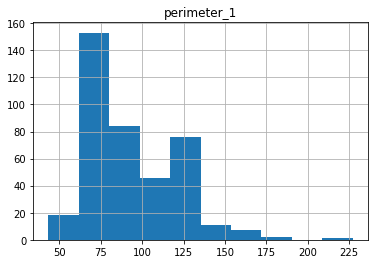

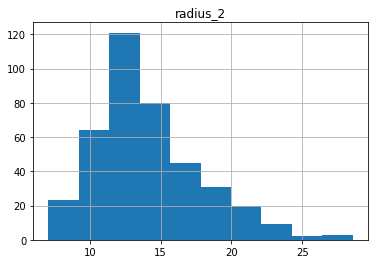

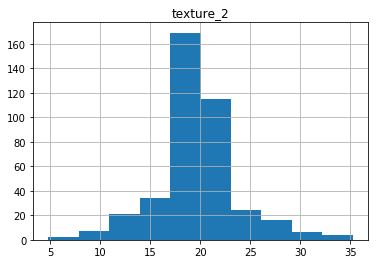

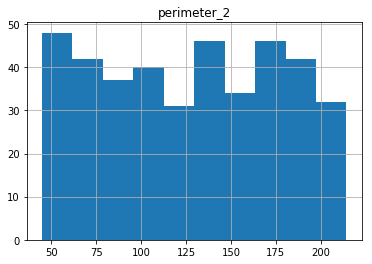

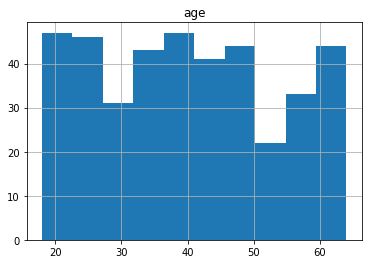

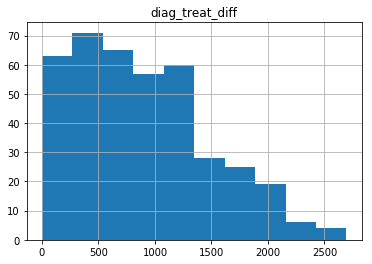

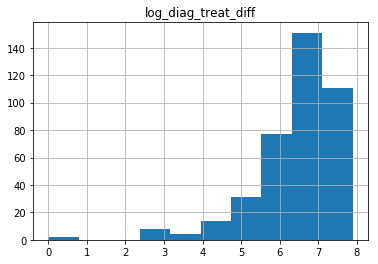

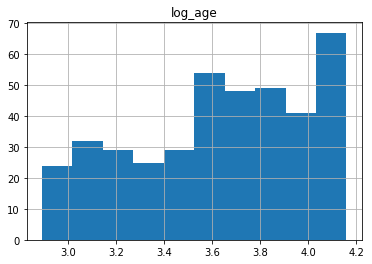

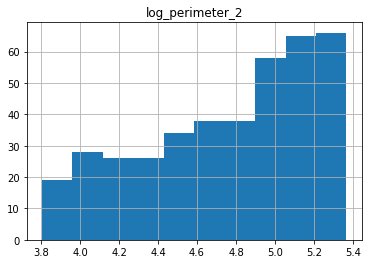

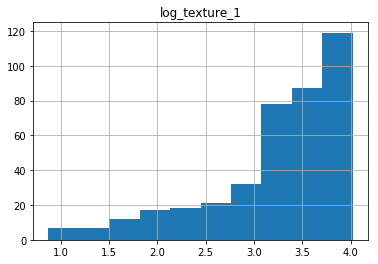

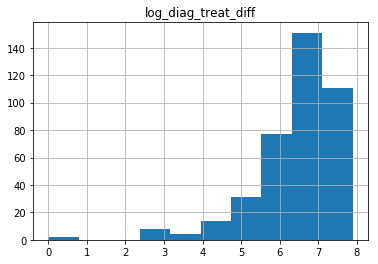

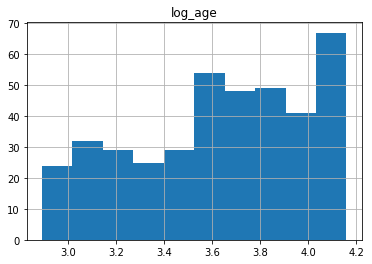

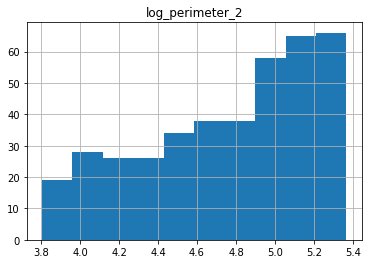

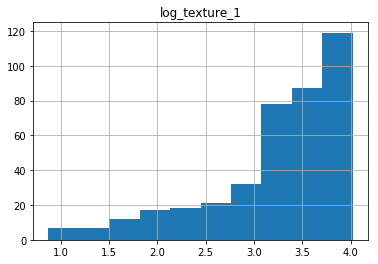

In [63]:
train_imputed_data_df['log_diag_treat_diff']  = np.log(train_imputed_data_df['diag_treat_diff'])
train_imputed_data_df['log_age']  = np.log(train_imputed_data_df['age'])
train_imputed_data_df['log_perimeter_2']  = np.log(train_imputed_data_df['perimeter_2'])
train_imputed_data_df['log_texture_1']  = np.log(train_imputed_data_df['texture_1'])
    
numeric_cols.extend(['log_diag_treat_diff','log_age','log_perimeter_2','log_texture_1'])
plot_distributions_hist(train_imputed_data_df,numeric_cols)
    
    

I see that, distribution of log_texture_2 and log_diag_treat_diff is more closer to gaussian distribution. So we select these two log transformations of columns. For rest distributions doesnt get closer to gaussian distribution.

Now i will calculate the variable importance of the explanatory variables using Variable Importance statistics of random forest.
I will be using this list of column for building a random forest, ['radius_0','texture_0','perimeter_0','radius_1','log_texture_1','perimeter_1','radius_2','texture_2','perimeter_2','age','log_diag_treat_diff','cancer_type']

Below is the method which calculates and plots the variable importance,


In [64]:
from sklearn.ensemble import RandomForestClassifier
## this method calculates variable importance based on random forest and plots the variable importance
def calculatePlot_Variable_Importance(tr_x,tr_y):
    regr = RandomForestClassifier(max_depth=2,random_state=0,n_estimators=100)
    regr.fit(tr_x,tr_y.cancer_type.tolist())

    importances = regr.feature_importances_
    std = np.std([tree.feature_importances_ for tree in regr.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(tr_x.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(tr_x.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
    plt.xticks(range(tr_x.shape[1]), indices)
    plt.xlim([-1, tr_x.shape[1]])
    plt.show()
    

Lets divide the train data into train and test_data (Ratio of Train:Test, 80:20) (The set on which i have to submit the results, i will call it final test data)

Feature ranking:
1. feature 5 (0.257372)
2. feature 2 (0.215598)
3. feature 3 (0.205277)
4. feature 7 (0.109896)
5. feature 0 (0.101717)
6. feature 6 (0.090807)
7. feature 1 (0.009952)
8. feature 4 (0.003972)
9. feature 8 (0.002610)
10. feature 9 (0.001527)
11. feature 10 (0.001272)


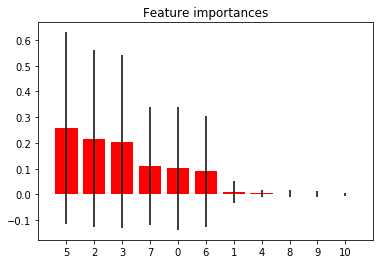

In [65]:
from sklearn.model_selection import train_test_split
## this method divides the input dataframe into train and test data.
def create_train_test_df(x_df,text_percentage):
    x_df = x_df.loc[:, ~x_df.columns.str.contains('^Unnamed')]
    train_X = x_df.drop(['cancer_type'],axis=1)
    train_Y = x_df[['cancer_type']]  
    X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=text_percentage, random_state=42)

    return X_train,X_test,y_train,y_test

selected_columns = ['radius_0','texture_0','perimeter_0','radius_1','log_texture_1','perimeter_1','radius_2','texture_2','perimeter_2','age','log_diag_treat_diff','cancer_type']
    
x_train, x_test, y_train, y_test =  create_train_test_df(train_imputed_data_df[selected_columns],0.20)
## Calculate variable importance based on Variable importance statistics of random forest.
calculatePlot_Variable_Importance(x_train,y_train)

The Variable importance plot shows that we have 6 variables which are coming importance. These variables have indices (5,2,7,3,0,6). Running the above code section 5 times (I ran this manually for 5 times, Each time it creates the train and test set randomly), and it persists these varible indices as most important onces. Looking at the variable names for these indices


In [66]:
important_Variables = [list(x_train)[i] for i in [0,2,3,5,6,7]]
print(important_Variables)
important_Variables_rf = important_Variables
important_Variables_rf.extend(['cancer_type'])

['radius_0', 'perimeter_0', 'radius_1', 'perimeter_1', 'radius_2', 'texture_2']


I will be using these 6 most important variables, radius_0,perimeter_0,radius_1, perimeter_1, radius_2 and texture_2 in the creating the model.

Fist I will create a Decision Tree and then calculate the models accuracy using a 10 cross validation.

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
def applyLogisticRegressionClassification(x_df,imp_var):
    
    from sklearn.linear_model import LogisticRegression
    
    random_state = np.random.RandomState(0)
    x_df1 = x_df[imp_var]
    X = x_df1.drop(['cancer_type'],axis=1)
    n_samples, n_features = X .shape
#    X = X.reset_index()
    
    y = x_df.cancer_type
#    y=y.reset_index()
    y=y.astype('int')
    
    
    clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X, y)
    LRScore = cross_val_score(clf, X, y, cv=10)
    
    clf.fit(X, y)
    
#    print(clf.density())
    print("Accuracy of Logistic with 10 cross validaion score=====>>>> ",str(LRScore))
    print("Mean and SD of Accuracy of Logistic with 10 cross validaion score=====>>>> " + "Mean: " + str(round(np.mean(LRScore),2)) + " Standard Deviation:" +str(round(np.std(LRScore),2)))
    
   
    clf.fit(x_tr_1, y_tr_1)
    
    
    
    
    y_pred = list(clf.predict(x_te_1))
#    y_pred = np.argmax(y_pred, axis=1)
    # Plot non-normalized confusion matrix
#    y_pred = (y_pred > 0.5)
    
    y_true = y_te_1.cancer_type.tolist()
#    x2 = (x2 > 0.5)
#    class_names = [0,1]
    print("\n\n\n\n")
    print("Logistic Regression Confusion Matrix:: ")
    print(confusion_matrix(y_true, y_pred))
    print("\n\n\n\n")
    
    
    
    
    
    return clf



x_tr_1, x_te_1, y_tr_1, y_te_1 =  create_train_test_df(train_imputed_data_df[important_Variables_rf],0.20)
y_tr_1=y_tr_1.astype('int')
lr_model = applyLogisticRegressionClassification(train_imputed_data_df,important_Variables_rf)


Accuracy of Logistic with 10 cross validaion score=====>>>>  [0.875 0.8   0.8   0.9   0.825 0.975 0.975 0.975 1.    1.   ]
Mean and SD of Accuracy of Logistic with 10 cross validaion score=====>>>> Mean: 0.91 Standard Deviation:0.08





Logistic Regression Confusion Matrix:: 
[[24  2]
 [ 5 49]]







C:\Users\Dell 3450\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The result of Logistic regression shows that, using cross validation the accuracy is coming around 91%.
Now lets

In [69]:
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
# import pydot
from sklearn.tree import DecisionTreeClassifier
# def apply_decision_tree_classification(x_df,imp_var):
    
#     # Fit Decision Tree model
# #    depth_list = [2,5,6,7,9]
# #    final_col_rmse_df = pd.DataFrame(columns = {'Tree_Max_Depth','RMSE'})
# #
#     x_df = x_df.loc[:, ~x_df.columns.str.contains('^Unnamed')]
#     x_train = x_df[imp_var]
#     y_train = x_df.cancer_type
    
#     y_train=y_train.astype('int')
#     clf = DecisionTreeClassifier(random_state=0)
#     DTScore = cross_val_score(clf, x_train, y_train, cv=10)
    
#     imp_var.extend(['cancer_type'])
#     x_train, x_test, y_train, y_test =  create_train_test_df(x_df[imp_var],0.20)
#     ## Calculate variable importance based on Variable importance statistics of random forest.
   
#     y_train=y_train.astype('int')

#     clf = clf.fit(x_train,y_train)
    
#     print("Accuracy of decision tree with 10 cross validaion score=====>>>> ",str(DTScore))
#     print("Mean and SD of Accuracy of decision tree with 10 cross validaion score=====>>>> " + "Mean: " + str(round(np.mean(DTScore),2)) + " Standard Deviation:" +str(round(np.std(DTScore),2)))
    
#     tree.export_graphviz(clf, out_file='tree.dot') #produces dot file
    

    
def apply_decision_tree_classification(x_df,imp_var):
    
    # Fit Decision Tree model
#    depth_list = [2,5,6,7,9]
#    final_col_rmse_df = pd.DataFrame(columns = {'Tree_Max_Depth','RMSE'})
#
    x_df = x_df.loc[:, ~x_df.columns.str.contains('^Unnamed')]
    x_train = x_df[imp_var]
    y_train = x_df.cancer_type
    
    y_train=y_train.astype('int')
    clf = DecisionTreeClassifier(random_state=0)
    DTScore = cross_val_score(clf, x_train, y_train, cv=10)
    print("Accuracy of decision tree with 10 cross validaion score=====>>>> ",str(DTScore))
    print("Mean and SD of Accuracy of decision tree with 10 cross validaion score=====>>>> " + "Mean: " + str(round(np.mean(DTScore),2)) + " Standard Deviation:" +str(round(np.std(DTScore),2)))
    
    
#     x_tr_1, x_te_1, y_tr_1, y_te_1 =  create_train_test_df(x_df[imp_var],0.20)
#     y_tr_1=y_tr_1.astype('int')
    clf.fit(x_tr_1, y_tr_1)
    
    tree.export_graphviz(clf, out_file='tree.dot') #produces dot file
    
    y_pred = list(clf.predict(x_te_1))
#    y_pred = np.argmax(y_pred, axis=1)
    # Plot non-normalized confusion matrix
#    y_pred = (y_pred > 0.5)
    print("Type of y_te_1" ,type(y_te_1))
    y_true = y_te_1.cancer_type.tolist()
#    x2 = (x2 > 0.5)
#    class_names = [0,1]
    print("\n\n\n\n")
    print("Decision Tree ,Confusion Matrix:: ")
    print(confusion_matrix(y_true, y_pred))
    print("\n\n\n\n")
    
    return clf
   # dotfile = StringIO('tree.dot')
  #  tree.export_graphviz(clf, out_file=dotfile)
  #  pydot.graph_from_dot_data(dotfile.getvalue()).write_png("dtree2.png")
###########################3 Start the Modelling with only important variables #############33
dt_model = apply_decision_tree_classification(train_imputed_data_df,important_Variables)
    

Accuracy of decision tree with 10 cross validaion score=====>>>>  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean and SD of Accuracy of decision tree with 10 cross validaion score=====>>>> Mean: 1.0 Standard Deviation:0.0
Type of y_te_1 <class 'pandas.core.frame.DataFrame'>





Decision Tree ,Confusion Matrix:: 
[[24  2]
 [ 7 47]]







So I see that, accuracy of the decision tree is coming around 90% on average during the 10-cross validation runs. Lets visulaize this decision tree model. The plotting of the tree.dot file is giving some error, so i commented the plotting code, and instead used a browser based treevisualizer http://www.webgraphviz.com/ by using the genrated tree.dit file. [Will show the tree by opening the pdf file manually]

Now, I will create a random forest model using the important variables and check its accuracy using 10-fold cross validation and see if it improves the accuracy.



In [71]:
# def applyRandomForestClassification(x_df,imp_var):
    

#     # Add noisy features
#     random_state = np.random.RandomState(0)
#     x_df1 = x_df[imp_var]
#     X = x_df1.drop(['cancer_type'],axis=1)
#     n_samples, n_features = X .shape
# #    X = X.reset_index()
    
#     y = x_df.cancer_type
# #    y=y.reset_index()
#     y=y.astype('int')
    
    
#     clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
    
#     RFScore = cross_val_score(clf, X, y, cv=10)
    
#     clf.fit(X, y)
    
#     print("Accuracy of Random Forest with 10 cross validaion score=====>>>> ",str(RFScore))
#     print("Mean and SD of Accuracy of Random Forest with 10 cross validaion score=====>>>> " + "Mean: " + str(round(np.mean(RFScore),2)) + " Standard Deviation:" +str(round(np.std(RFScore),2)))
    

    
def applyRandomForestClassification(x_df,imp_var):
    

    # Add noisy features
    random_state = np.random.RandomState(0)
    x_df1 = x_df[imp_var]
    X = x_df1.drop(['cancer_type'],axis=1)
    n_samples, n_features = X .shape
#    X = X.reset_index()
    
    y = x_df.cancer_type
#    y=y.reset_index()
    y=y.astype('int')
    
    
    clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
    
    RFScore = cross_val_score(clf, X, y, cv=10)
    
    
    
    print("Accuracy of Random Forest with 10 cross validaion score=====>>>> ",str(RFScore))
    print("Mean and SD of Accuracy of Random Forest with 10 cross validaion score=====>>>> " + "Mean: " + str(round(np.mean(RFScore),2)) + " Standard Deviation:" +str(round(np.std(RFScore),2)))
    
#     x_tr_1, x_te_1, y_tr_1, y_te_1 =  create_train_test_df(x_df[important_Variables_rf],0.20)
#     y_tr_1=y_tr_1.astype('int')
    clf.fit(x_tr_1, y_tr_1)
    
    y_pred = list(clf.predict(x_te_1))
#    y_pred = np.argmax(y_pred, axis=1)
    # Plot non-normalized confusion matrix
#    y_pred = (y_pred > 0.5)
    
    y_true = y_te_1.cancer_type.tolist()
#    x2 = (x2 > 0.5)
#    class_names = [0,1]
    print("\n\n\n\n")
    print("Confusion Matrix:: ")
    print(confusion_matrix(y_true, y_pred))
    print("\n\n\n\n")
    
    return clf
    
    
important_Variables_rf = important_Variables
important_Variables_rf.extend(['cancer_type'])
    
rf_model = applyRandomForestClassification(train_imputed_data_df,important_Variables_rf)
    

Accuracy of Random Forest with 10 cross validaion score=====>>>>  [0.825      0.85       0.825      0.925      0.9        0.95
 0.975      1.         1.         0.97435897]
Mean and SD of Accuracy of Random Forest with 10 cross validaion score=====>>>> Mean: 0.92 Standard Deviation:0.07





Confusion Matrix:: 
[[24  2]
 [ 4 50]]







C:\Users\Dell 3450\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Now, the accuracy increase to on an average 92% in the runs of cross validation.

Now, Lets try the modelling using Multi Layer Peceptron (Neural network) and find the average accuracy using K-fold cross validation.


In [73]:
from sklearn.neural_network import MLPClassifier

# def applyNeuralNetClassification(x_df,imp_var):
#     random_state = np.random.RandomState(0)
#     x_df1 = x_df[imp_var]
#     X = x_df1.drop(['cancer_type'],axis=1)
#     n_samples, n_features = X .shape
# #    X = X.reset_index()
    
#     y = x_df.cancer_type
# #    y=y.reset_index()
#     y=y.astype('int')
    
    
#     clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), random_state=1)

#     MLPScore = cross_val_score(clf, X, y, cv=10)
    
#     clf.fit(X, y)
    
#     print("Accuracy of MLP with 10 cross validaion score=====>>>> ",str(MLPScore))
#     print("Mean and SD of Accuracy of MLP with 10 cross validaion score=====>>>> " + "Mean: " + str(round(np.mean(MLPScore),2)) + " Standard Deviation:" +str(round(np.std(MLPScore),2)))

    
def applyNeuralNetClassification(x_df,imp_var):
    random_state = np.random.RandomState(0)
    x_df1 = x_df[imp_var]
    X = x_df1.drop(['cancer_type'],axis=1)
    n_samples, n_features = X .shape
#    X = X.reset_index()
    
    y = x_df.cancer_type
#    y=y.reset_index()
    y=y.astype('int')
    
    
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), random_state=1)

    MLPScore = cross_val_score(clf, X, y, cv=10)
    
    clf.fit(X, y)
    
    print("Accuracy of MLP with 10 cross validaion score=====>>>> ",str(MLPScore))
    print("Mean and SD of Accuracy of MLP with 10 cross validaion score=====>>>> " + "Mean: " + str(round(np.mean(MLPScore),2)) + " Standard Deviation:" +str(round(np.std(MLPScore),2)))
    
#     x_tr_1, x_te_1, y_tr_1, y_te_1 =  create_train_test_df(x_df[important_Variables_rf],0.20)
#     y_tr_1=y_tr_1.astype('int')
    clf.fit(x_tr_1, y_tr_1)
    
    y_pred = list(clf.predict(x_te_1))
#    y_pred = np.argmax(y_pred, axis=1)
    # Plot non-normalized confusion matrix
#    y_pred = (y_pred > 0.5)
    
    y_true = y_te_1.cancer_type.tolist()
#    x2 = (x2 > 0.5)
#    class_names = [0,1]
    print("\n\n\n\n")
    print("MLP Confusion Matrix:: ")
    print(confusion_matrix(y_true, y_pred))
    print("\n\n\n\n")
    
    return clf
    
mlp_model = applyNeuralNetClassification(train_imputed_data_df,important_Variables_rf)
    

Accuracy of MLP with 10 cross validaion score=====>>>>  [0.375      0.375      0.375      0.375      0.375      0.375
 0.375      0.375      0.35897436 0.35897436]
Mean and SD of Accuracy of MLP with 10 cross validaion score=====>>>> Mean: 0.37 Standard Deviation:0.01





MLP Confusion Matrix:: 
[[26  0]
 [54  0]]







C:\Users\Dell 3450\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


I see that now neuralnetwork is giving an average accuracy of about 91%,which is equivalent/less than to that of random forest.So it seems
that increasing the complexity of model more is not helping to improve the accuracy of the predictions.

Now I will apply the similar missing data imputation strategy on final test data, so that, we have data ready for final prediction,


In [74]:
def final_test_impute_missing_Values_train(x_df):
    train_data_rad_1NoNAN_df = x_df[x_df.radius_1.notnull()]
    
    mean_radius_1_ct_0 = train_data_rad_1NoNAN_df.loc[train_data_rad_1NoNAN_df.Cluster == 0,].radius_1.mean()
    mean_radius_1_ct_1 = train_data_rad_1NoNAN_df.loc[train_data_rad_1NoNAN_df.Cluster == 1,].radius_1.mean()
    
    train_data_per1NoNAN_df = x_df[x_df.perimeter_1.notnull()]
    
    mean_periM_1_ct_0 = train_data_per1NoNAN_df.loc[train_data_per1NoNAN_df.Cluster == 0,].perimeter_1.mean()
    mean_periM_1_ct_1 = train_data_per1NoNAN_df.loc[train_data_per1NoNAN_df.Cluster == 1,].perimeter_1.mean()

    train_data_tx2Noxx_df = x_df.loc[x_df.texture_2 != 'xx',]
    
    train_data_tx2Noxx_df.texture_2 = train_data_tx2Noxx_df.texture_2.apply(float)
#    train_data_tx2Noxx_df.texture_2 = train_data_tx2Noxx_df.texture_2.apply(float)
    
    mean_text_2_ct_0 = train_data_tx2Noxx_df.loc[train_data_tx2Noxx_df.Cluster == 0,].texture_2.mean()
    mean_text_2_ct_1 = train_data_tx2Noxx_df.loc[train_data_tx2Noxx_df.Cluster == 1,].texture_2.mean()

    
    train_rad_1null_df = x_df[x_df.radius_1.isnull()]
#    train_rad_1null_df.loc[train_rad_1null_df.Cluster == 0,'radius_1'] = mean_radius_1_ct_0
#    train_rad_1null_df.loc[train_rad_1null_df.Cluster == 1,'radius_1'] = mean_radius_1_ct_1
#    train_rad_1null_df.to_csv("train_rad_1null_df.csv")
    train_rad_1null_df['radius_1'] = np.where(train_rad_1null_df.Cluster == 0, mean_radius_1_ct_0, train_rad_1null_df.radius_1)
    train_rad_1null_df['radius_1'] = np.where(train_rad_1null_df.Cluster == 1, mean_radius_1_ct_1, train_rad_1null_df.radius_1)
    train_rad_1null_df['texture_2'] = np.where(train_rad_1null_df.Cluster == 0, mean_text_2_ct_0, train_rad_1null_df.texture_2)
    train_rad_1null_df['texture_2'] = np.where(train_rad_1null_df.Cluster == 1, mean_text_2_ct_1, train_rad_1null_df.texture_2)
   
    
    train_rad_1null_df.to_csv("train_rad_1null_df.csv")
    
    train_peri_1null_df = x_df[x_df.perimeter_1.isnull()]
#    train_rad_1null_df.loc[train_rad_1null_df.Cluster == 0,'radius_1'] = mean_radius_1_ct_0
#    train_rad_1null_df.loc[train_rad_1null_df.Cluster == 1,'radius_1'] = mean_radius_1_ct_1
#    train_rad_1null_df.to_csv("train_rad_1null_df.csv")
    train_peri_1null_df['perimeter_1'] = np.where(train_peri_1null_df.Cluster == 0, mean_periM_1_ct_0, train_peri_1null_df.perimeter_1)
    train_peri_1null_df['perimeter_1'] = np.where(train_peri_1null_df.Cluster == 1, mean_periM_1_ct_1, train_peri_1null_df.perimeter_1)
    train_peri_1null_df['texture_2'] = np.where(train_peri_1null_df.Cluster == 0, mean_text_2_ct_0, train_peri_1null_df.texture_2)
    train_peri_1null_df['texture_2'] = np.where(train_peri_1null_df.Cluster == 1, mean_text_2_ct_1, train_peri_1null_df.texture_2)
   
    
    
    train_peri_1null_df.to_csv("train_peri_1null_df.csv")
    
    train_data_tx2xx_df = x_df.loc[(x_df.texture_2 == 'xx') & (x_df.perimeter_1.notnull() & (x_df.radius_1.notnull())),]
    
    train_data_tx2xx_df['texture_2'] = np.where(train_data_tx2xx_df.Cluster == 0, mean_text_2_ct_0, train_data_tx2xx_df.texture_2)
    train_data_tx2xx_df['texture_2'] = np.where(train_data_tx2xx_df.Cluster == 1, mean_text_2_ct_1, train_data_tx2xx_df.texture_2)
    train_data_tx2xx_df['radius_1'] = np.where(train_data_tx2xx_df.Cluster == 0, mean_radius_1_ct_0, train_data_tx2xx_df.radius_1)
    train_data_tx2xx_df['radius_1'] = np.where(train_data_tx2xx_df.Cluster == 1, mean_radius_1_ct_1, train_data_tx2xx_df.radius_1)
    train_data_tx2xx_df['perimeter_1'] = np.where(train_data_tx2xx_df.Cluster == 0, mean_periM_1_ct_0, train_data_tx2xx_df.perimeter_1)
    train_data_tx2xx_df['perimeter_1'] = np.where(train_data_tx2xx_df.Cluster == 1, mean_periM_1_ct_1, train_data_tx2xx_df.perimeter_1)
    
    
    train_data_tx2xx_df.to_csv("train_data_tx2xx_df.csv")
    
    replaced_values_df = pd.DataFrame(columns = list(final_test_data_df))
    replaced_values_df = replaced_values_df.append(train_rad_1null_df)
    replaced_values_df = replaced_values_df.append(train_peri_1null_df)
    replaced_values_df = replaced_values_df.append(train_data_tx2xx_df)
    
    x_df_rest = final_test_data_df[final_test_data_df.radius_1.notnull()]
    x_df_rest = x_df_rest[x_df_rest.perimeter_1.notnull()]
    x_df_rest = x_df_rest.loc[x_df_rest.texture_2 != 'xx',]
    
    x_return_df = pd.DataFrame(columns = list(final_test_data_df))
    x_return_df = x_return_df.append(x_df_rest)
    x_return_df = x_return_df.append(replaced_values_df)
    x_return_df.drop_duplicates(inplace=True)
#    x_return_df = x_return_df.append(train_data_tx2xx_df)
    return x_return_df


final_test_data_allNum_df = final_test_data_df[['radius_0','texture_0','perimeter_0','texture_1','radius_2','perimeter_2','age','diag_treat_diff']]
#    final_test_allNum_df = final_test_data_allNum_df.loc[final_test_data_allNum_df.texture_2 != 'xx',]
    
    
kmeans = KMeans(n_clusters=2)
kmeans.fit(final_test_data_allNum_df)
centroids = kmeans.cluster_centers_
print(centroids)
print(kmeans.labels_)
final_test_data_df = final_test_data_df.assign(Cluster = kmeans.labels_)
    
final_test_imputed_data_df = final_test_impute_missing_Values_train(final_test_data_df)
final_test_imputed_data_df.to_csv("final_test_imputed_data_df_1.csv")
    


[[  21.2617532    19.24727676   92.54858614   29.74012654   14.17490285
   129.32451722   40.32394366 1556.64788732]
 [  21.16269527   19.79104263   91.91337258   26.68868023   14.02167869
   130.10289303   40.29        471.45      ]]
[0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0
 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1
 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0]


C:\Users\Dell 3450\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\Dell 3450\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dell 3450\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

In [75]:
final_test_tr = final_test_imputed_data_df[list(x_tr_1)]
final_pred_rf = list(rf_model.predict(final_test_tr))
pd.DataFrame(data ={'cancer_type':final_pred_rf}).to_csv("final_prediction_rf.csv")
    
final_pred_dt = list(dt_model.predict(final_test_tr))
pd.DataFrame(data ={'cancer_type':final_pred_dt}).to_csv("final_prediction_dt.csv")
    
final_pred_mlp = list(mlp_model.predict(final_test_tr))
pd.DataFrame(data ={'cancer_type':final_pred_mlp}).to_csv("final_prediction_mlp.csv")
    
final_pred_lr = list(lr_model.predict(final_test_tr))
pd.DataFrame(data ={'cancer_type':final_pred_lr}).to_csv("final_prediction_lr.csv")
    

3.) Lets do the regression between radius_1 and perimeter 2,

[0.6508155516043087, 0.6612928051293654, 0.6478702717163457]


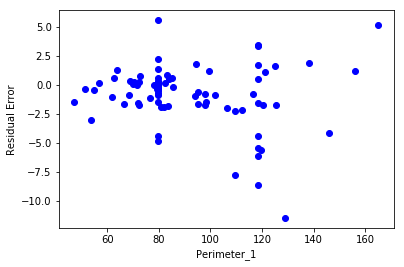

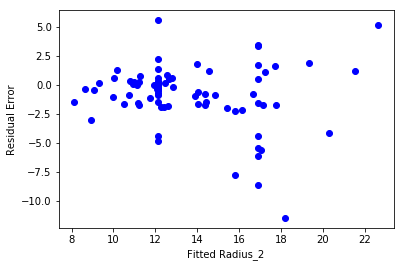

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
## Root mean square Error.
from sklearn.metrics import mean_squared_error
from math import sqrt

    
X_reg = x_tr_1[['perimeter_1']]
Y_reg = x_tr_1[['radius_2']]
    
reg = LinearRegression().fit(X_reg,Y_reg )
reg.score(X_reg, Y_reg)
    
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X_reg, Y_reg)):
    reg.fit(X_reg.iloc[train,:], Y_reg.iloc[train,:])
    score = reg.score(X_reg.iloc[test,:], Y_reg.iloc[test,:])
    scores.append(score)
print(scores)

y_pred = reg.predict(x_te_1[['perimeter_1']])
y_act = x_te_1.radius_1.tolist()

y_pred_arr = [item[0] for item in y_pred]
resid_e_arr = list(np.array(y_pred_arr) - np.array(y_act))
# plot.scatter(xTrain, yTrain, color = 'red')
plt.scatter(x_te_1.perimeter_1,resid_e_arr,  color = 'blue')
# plot.title('Salary vs Experience (Training set)')
plt.xlabel('Perimeter_1')
plt.ylabel('Residual Error')
plt.show()


plt.scatter(y_pred,resid_e_arr,  color = 'blue')
# plot.title('Salary vs Experience (Training set)')
plt.xlabel('Fitted Radius_2')
plt.ylabel('Residual Error')
plt.show()


############### Do a transformation of Perimeter_1############################3 






On an average the residual doesnt show an increasing or decreasing pattern, So I think we can do without transforming explanatory variables.Wee see that the variance of residual error increases with the X (Perimeter_1). So I should try some transformations of the response variable radius_2 (Log,Square, Root etc) and see the residual plot.

[0.5938561532503748, 0.6410778685767711, 0.6404116860197852]


C:\Users\Dell 3450\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


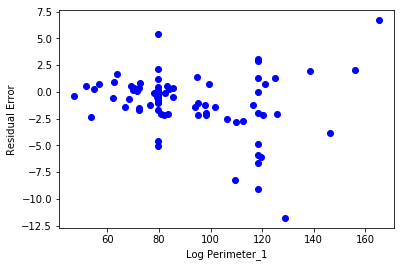

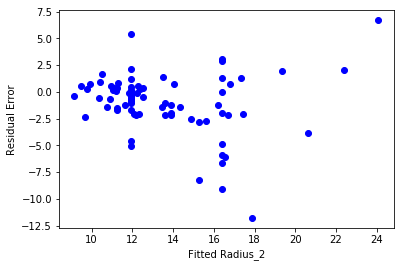

In [78]:
X_reg = x_tr_1[['perimeter_1']]

Y_reg = x_tr_1[['radius_2']]
Y_reg['Log_radius_2'] = np.log(Y_reg.radius_2)
Y_log_reg = Y_reg[['Log_radius_2']]
    
reg = LinearRegression().fit(X_reg,Y_log_reg )
reg.score(X_reg, Y_log_reg)
    
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X_reg, Y_log_reg)):
    reg.fit(X_reg.iloc[train,:], Y_log_reg.iloc[train,:])
    score = reg.score(X_reg.iloc[test,:], Y_log_reg.iloc[test,:])
    scores.append(score)
print(scores)

x_te_1['perimeter_1'] = x_te_1.perimeter_1
y_pred = reg.predict(x_te_1[['perimeter_1']])
y_act = x_te_1.radius_1.tolist()

y_pred_arr = [np.exp(item[0]) for item in y_pred]
resid_e_arr = list(np.array(y_pred_arr) - np.array(y_act))
# plot.scatter(xTrain, yTrain, color = 'red')
plt.scatter(x_te_1.perimeter_1,resid_e_arr,  color = 'blue')
# plot.title('Salary vs Experience (Training set)')
plt.xlabel('Log Perimeter_1')
plt.ylabel('Residual Error')
plt.show()



plt.scatter(y_pred_arr,resid_e_arr,  color = 'blue')
# plot.title('Salary vs Experience (Training set)')
plt.xlabel('Fitted Radius_2')
plt.ylabel('Residual Error')
plt.show()

Still we do not see, a constant variance, so next i will try a sqrt transformation of response variable.

[0.6289266138795612, 0.6543407389608016, 0.6488241785469481]


C:\Users\Dell 3450\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


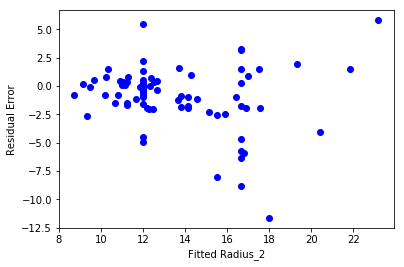

In [79]:
X_reg = x_tr_1[['perimeter_1']]

Y_reg = x_tr_1[['radius_2']]
Y_reg['sqr_radius_2'] = np.sqrt(Y_reg.radius_2)
Y_sqr_reg = Y_reg[['sqr_radius_2']]
    
reg = LinearRegression().fit(X_reg,Y_sqr_reg )
reg.score(X_reg, Y_sqr_reg)
    
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X_reg, Y_sqr_reg)):
    reg.fit(X_reg.iloc[train,:], Y_sqr_reg.iloc[train,:])
    score = reg.score(X_reg.iloc[test,:], Y_sqr_reg.iloc[test,:])
    scores.append(score)
print(scores)

x_te_1['perimeter_1'] = x_te_1.perimeter_1
y_pred = reg.predict(x_te_1[['perimeter_1']])
y_act = x_te_1.radius_1.tolist()

y_pred_arr = [pow(item[0],2 ) for item in y_pred]
resid_e_arr = list(np.array(y_pred_arr) - np.array(y_act))
# plot.scatter(xTrain, yTrain, color = 'red')
# plt.scatter(x_te_1.perimeter_1,resid_e_arr,  color = 'blue')
# # plot.title('Salary vs Experience (Training set)')
# plt.xlabel('Log Perimeter_1')
# plt.ylabel('Residual Error')
# plt.show()



plt.scatter(y_pred_arr,resid_e_arr,  color = 'blue')
# plot.title('Salary vs Experience (Training set)')
plt.xlabel('Fitted Radius_2')
plt.ylabel('Residual Error')
plt.show()

This transformation also does not look reducing the variance of residuals vs fitted response variable. As a next step I would like to to try some more transformations square of radius_2 for example, (Which I am not able to do right now, due to lack of time). 

In [80]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_val =sum(map(lambda x:x*x,resid_e_arr))

Value of RMSE :

In [29]:
rmse_val

658.4998043776361